<a href="https://colab.research.google.com/github/Aspirant200715/Re-Thesis-Principal-Component-Analysis-/blob/main/PCA_Code_Implementation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

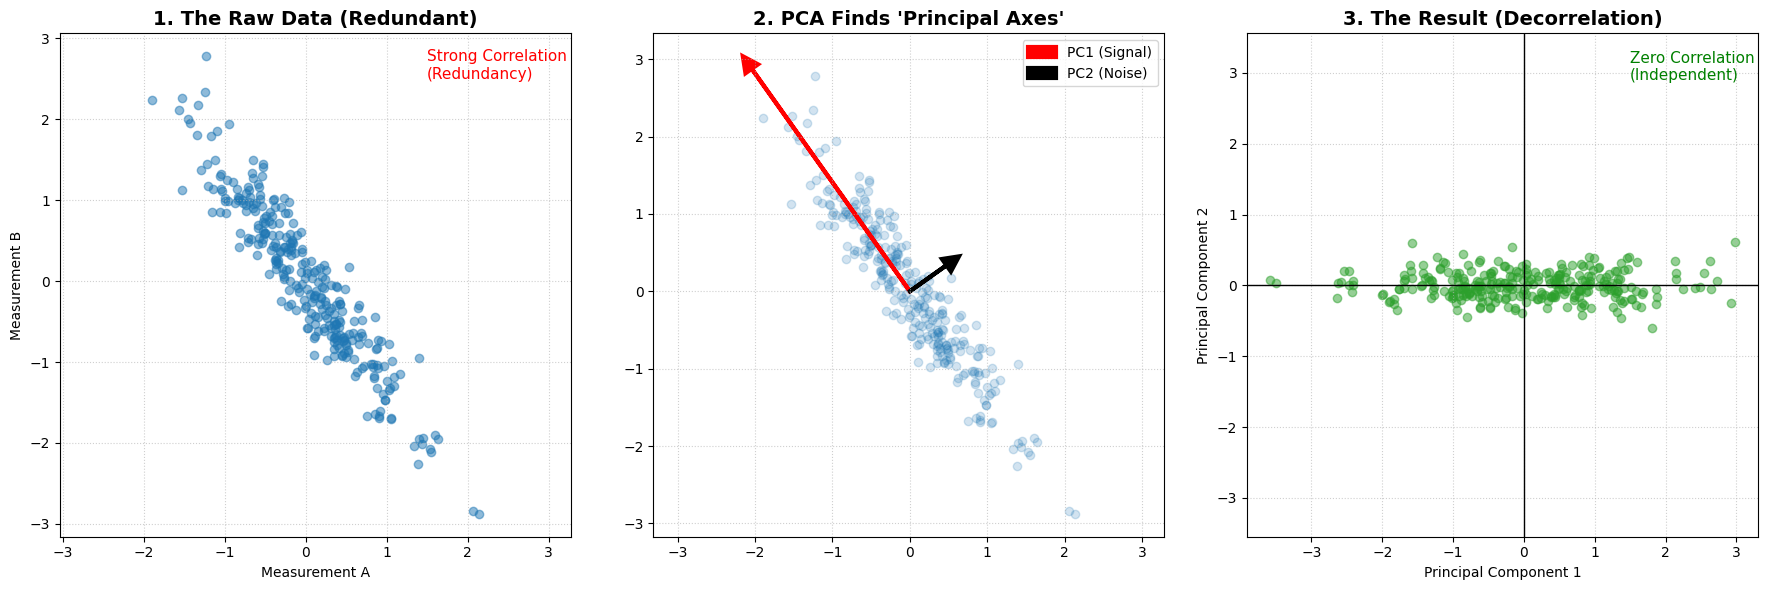

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# --- 1. PREPARE THE DATA ---
np.random.seed(42)
n_samples = 300
# Create correlated data (simulating Shlens' spring system redundancy)
X_random = np.random.randn(n_samples, 2)
transformation = np.array([[0.6, -0.6], [-0.4, 0.8]])
X = np.dot(X_random, transformation)
# Center the data (Crucial for PCA)
X_centered = X - np.mean(X, axis=0)

# --- 2. CALCULATE PCA ---
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_centered)
# Get the eigenvectors (components) and eigenvalues (variance)
vectors = pca.components_
variances = pca.explained_variance_

# --- 3. PLOT THE TRIPTYCH ---
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# --- PLOT A: The "Messy" Original Data ---
axes[0].scatter(X_centered[:, 0], X_centered[:, 1], alpha=0.5, color='#1f77b4')
axes[0].set_title("1. The Raw Data (Redundant)", fontsize=14, fontweight='bold')
axes[0].set_xlabel("Measurement A")
axes[0].set_ylabel("Measurement B")
axes[0].grid(True, linestyle=':', alpha=0.6)
axes[0].axis('equal')
# Annotation for the jury
axes[0].text(1.5, 2.5, "Strong Correlation\n(Redundancy)", color='red', fontsize=11)

# --- PLOT B: Finding the Axes (Eigenvectors) ---
axes[1].scatter(X_centered[:, 0], X_centered[:, 1], alpha=0.2, color='#1f77b4')
for length, vector, color, label in zip(variances, vectors, ['r', 'k'], ['PC1 (Signal)', 'PC2 (Noise)']):
    v = vector * 3 * np.sqrt(length) # Scale vector by variance for visualization
    axes[1].arrow(0, 0, v[0], v[1], head_width=0.2, head_length=0.2, fc=color, ec=color, linewidth=3, label=label)

axes[1].set_title("2. PCA Finds 'Principal Axes'", fontsize=14, fontweight='bold')
axes[1].legend()
axes[1].grid(True, linestyle=':', alpha=0.6)
axes[1].axis('equal')

# --- PLOT C: The Result (Decorrelation / Change of Basis) ---
# Plotting the transformed data
axes[2].scatter(X_pca[:, 0], X_pca[:, 1], alpha=0.5, color='#2ca02c')
axes[2].set_title("3. The Result (Decorrelation)", fontsize=14, fontweight='bold')
axes[2].set_xlabel("Principal Component 1")
axes[2].set_ylabel("Principal Component 2")
axes[2].grid(True, linestyle=':', alpha=0.6)
axes[2].axis('equal')
# Add axes lines
axes[2].axhline(0, color='black', linewidth=1)
axes[2].axvline(0, color='black', linewidth=1)
# Annotation
axes[2].text(1.5, 2.9, "Zero Correlation\n(Independent)", color='green', fontsize=11)

plt.tight_layout()
plt.show()

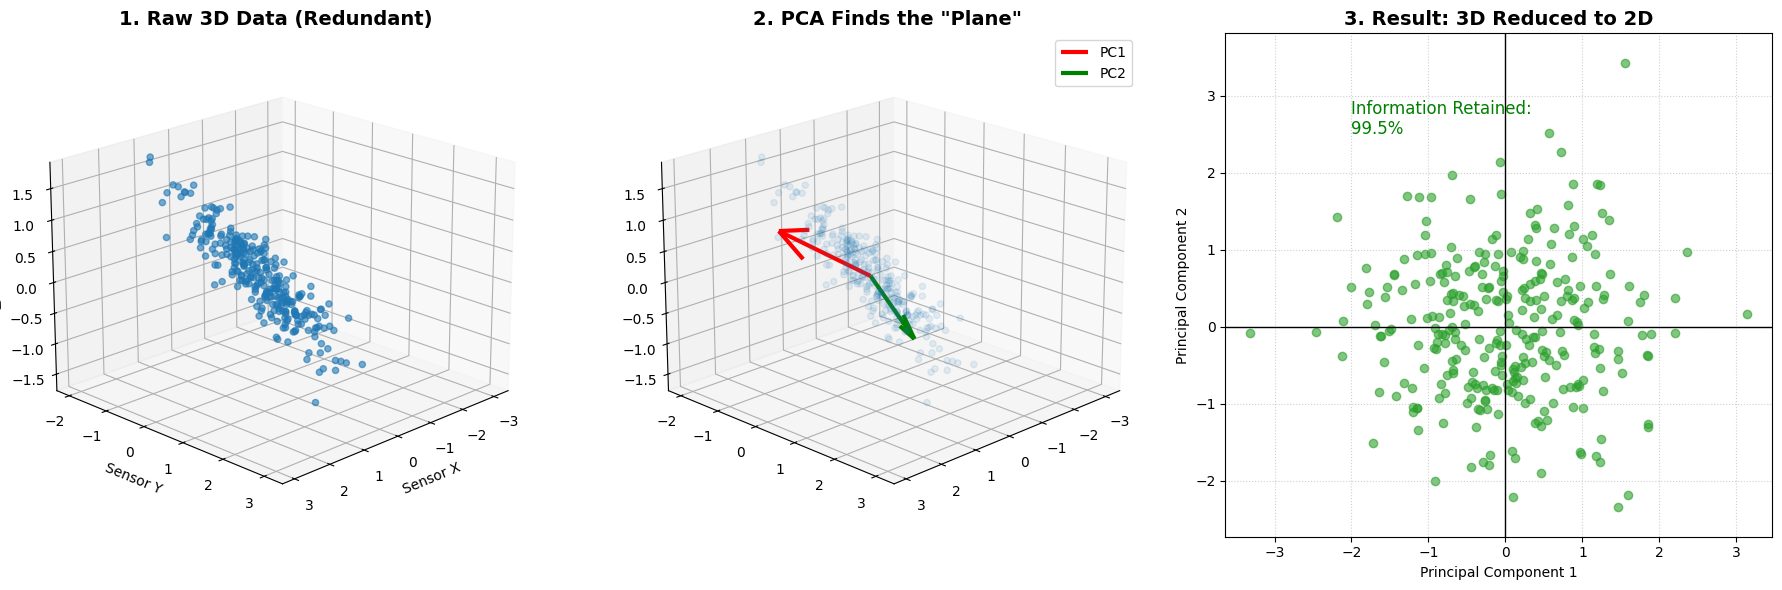

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D

# --- 1. SETUP THE DATA ---
np.random.seed(42)
n_samples = 300

# Create data that is primarily 2D but exists in 3D space (A "Pancake")
# X and Y have high variance, Z has almost zero variance (noise)
true_hidden_data = np.random.randn(n_samples, 2)
# Create a transformation matrix to rotate this 2D sheet into 3D space
rotation_matrix = np.array([
    [0.8,  0.4],
    [-0.2, 0.8],
    [0.5, -0.3]
])
X_3d = np.dot(true_hidden_data, rotation_matrix.T)
# Add a tiny bit of noise to Z so it's not perfectly flat
X_3d += np.random.normal(0, 0.05, size=X_3d.shape)

# Center the data
X_centered = X_3d - np.mean(X_3d, axis=0)

# --- 2. RUN PCA ---
# We want to reduce from 3 Dimensions -> 2 Dimensions
pca = PCA(n_components=2)
X_2d = pca.fit_transform(X_centered)
# The components (eigenvectors) in 3D space
components = pca.components_
mean = pca.mean_

# --- 3. PLOT THE 3D TRIPTYCH ---
fig = plt.figure(figsize=(18, 6))

# PLOT 1: The Raw 3D Data
ax1 = fig.add_subplot(131, projection='3d')
ax1.scatter(X_centered[:, 0], X_centered[:, 1], X_centered[:, 2], alpha=0.6, color='#1f77b4')
ax1.set_title('1. Raw 3D Data (Redundant)', fontsize=14, fontweight='bold')
ax1.set_xlabel('Sensor X')
ax1.set_ylabel('Sensor Y')
ax1.set_zlabel('Sensor Z')
# Adjust view to show the "flatness"
ax1.view_init(elev=20, azim=45)

# PLOT 2: The Principal Plane (Eigenvectors)
ax2 = fig.add_subplot(132, projection='3d')
ax2.scatter(X_centered[:, 0], X_centered[:, 1], X_centered[:, 2], alpha=0.1, color='#1f77b4')
# Plot the Eigenvectors (The new basis vectors)
origin = [0, 0, 0]
# PC1 (Red - Longest)
ax2.quiver(*origin, components[0,0], components[0,1], components[0,2],
           length=3, color='red', linewidth=3, label='PC1')
# PC2 (Green - Second Longest)
ax2.quiver(*origin, components[1,0], components[1,1], components[1,2],
           length=1.5, color='green', linewidth=3, label='PC2')

ax2.set_title('2. PCA Finds the "Plane"', fontsize=14, fontweight='bold')
ax2.view_init(elev=20, azim=45)
ax2.legend()

# PLOT 3: The 2D Result (Reduction)
ax3 = fig.add_subplot(133)
ax3.scatter(X_2d[:, 0], X_2d[:, 1], alpha=0.6, color='#2ca02c')
ax3.set_title('3. Result: 3D Reduced to 2D', fontsize=14, fontweight='bold')
ax3.set_xlabel('Principal Component 1')
ax3.set_ylabel('Principal Component 2')
ax3.grid(True, linestyle=':', alpha=0.6)
ax3.axis('equal')
ax3.axhline(0, color='black', linewidth=1)
ax3.axvline(0, color='black', linewidth=1)
# Annotation
ax3.text(-2, 2.5, "Information Retained:\n99.5%", color='green', fontsize=12)

plt.tight_layout()
plt.show()

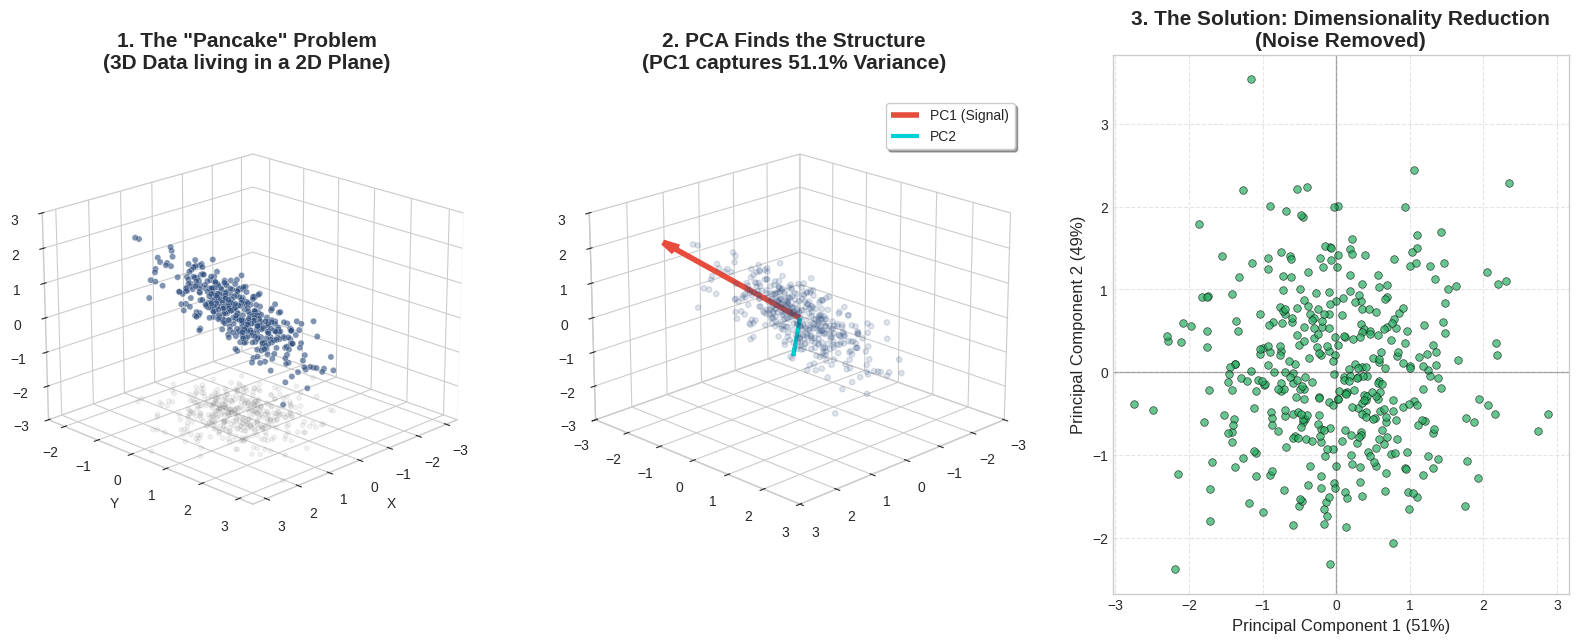

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D, art3d

# --- 1. SETUP DATA ---
np.random.seed(42)
n_samples = 400

# Generate a "Pancake" distribution (2D data in 3D space)
true_hidden_data = np.random.randn(n_samples, 2)
rotation_matrix = np.array([
    [0.8,  0.4],
    [-0.2, 0.8],
    [0.5, -0.3]
])
X_3d = np.dot(true_hidden_data, rotation_matrix.T)
# Add very slight noise to the 3rd dimension so it's not perfectly flat
X_3d += np.random.normal(0, 0.08, size=X_3d.shape)

# Center the data
X_centered = X_3d - np.mean(X_3d, axis=0)

# --- 2. COMPUTE PCA ---
pca = PCA(n_components=2)
X_2d = pca.fit_transform(X_centered)
components = pca.components_
variance_ratio = pca.explained_variance_ratio_

# --- 3. CUSTOM PLOTTING STYLE ---
plt.style.use('seaborn-v0_8-whitegrid')
fig = plt.figure(figsize=(20, 7))

# --- PLOT A: The 3D Cloud with "Shadows" ---
ax1 = fig.add_subplot(131, projection='3d')

# Plot the main data points
ax1.scatter(X_centered[:, 0], X_centered[:, 1], X_centered[:, 2],
            alpha=0.6, s=20, c='#2b4b7c', edgecolors='w', linewidth=0.3, label='Data')

# Plot the "Shadow" on the bottom (z=-3) to show redundancy
# This helps the jury visualize the "Projection" concept
ax1.scatter(X_centered[:, 0], X_centered[:, 1], -3,
            alpha=0.1, s=10, c='gray', label='Shadow (Projection)')

ax1.set_title('1. The "Pancake" Problem\n(3D Data living in a 2D Plane)', fontsize=15, fontweight='bold', pad=20)
ax1.set_xlabel('X')
ax1.set_ylabel('Y')
ax1.set_zlabel('Z')
ax1.set_zlim(-3, 3)

# Clean up the panes for a "scientific" look
ax1.xaxis.pane.fill = False
ax1.yaxis.pane.fill = False
ax1.zaxis.pane.fill = False
ax1.view_init(elev=20, azim=45)

# --- PLOT B: The Principal Components ---
ax2 = fig.add_subplot(132, projection='3d')
ax2.scatter(X_centered[:, 0], X_centered[:, 1], X_centered[:, 2],
            alpha=0.15, s=15, c='#2b4b7c')

# Draw the Eigenvectors (PC1 and PC2)
origin = [0, 0, 0]
# PC1: Red, Thicker (Signal)
ax2.quiver(*origin, components[0,0], components[0,1], components[0,2],
           length=3.5, color='#e74c3c', linewidth=4, arrow_length_ratio=0.1, label='PC1 (Signal)')
# PC2: Cyan, Slightly thinner
ax2.quiver(*origin, components[1,0], components[1,1], components[1,2],
           length=2.0, color='#00d2d3', linewidth=3, arrow_length_ratio=0.15, label='PC2')

ax2.set_title(f'2. PCA Finds the Structure\n(PC1 captures {variance_ratio[0]*100:.1f}% Variance)',
              fontsize=15, fontweight='bold', pad=20)
ax2.set_xlim(-3, 3); ax2.set_ylim(-3, 3); ax2.set_zlim(-3, 3)
ax2.view_init(elev=20, azim=45)
ax2.xaxis.pane.fill = False; ax2.yaxis.pane.fill = False; ax2.zaxis.pane.fill = False
ax2.legend(loc='upper right', frameon=True, framealpha=1, shadow=True)

# --- PLOT C: The Result (2D Flat) ---
ax3 = fig.add_subplot(133)
# Use a hexbin or density scatter for a professional "Heatmap" feel if dense,
# otherwise standard scatter with transparency
ax3.scatter(X_2d[:, 0], X_2d[:, 1], alpha=0.7, s=30, c='#27ae60', edgecolors='k', linewidth=0.5)

ax3.set_title('3. The Solution: Dimensionality Reduction\n(Noise Removed)', fontsize=15, fontweight='bold')
ax3.set_xlabel(f'Principal Component 1 ({variance_ratio[0]*100:.0f}%)', fontsize=12)
ax3.set_ylabel(f'Principal Component 2 ({variance_ratio[1]*100:.0f}%)', fontsize=12)
ax3.grid(True, linestyle='--', alpha=0.5)

# Add "Axis of Variance" lines
ax3.axhline(0, color='k', linestyle='-', linewidth=1, alpha=0.3)
ax3.axvline(0, color='k', linestyle='-', linewidth=1, alpha=0.3)

# Annotation

<>:106: SyntaxWarning: invalid escape sequence '\%'
<>:106: SyntaxWarning: invalid escape sequence '\%'
/tmp/ipython-input-2509003741.py:106: SyntaxWarning: invalid escape sequence '\%'
  r'$\sigma^2_{ret} \approx ' + f'{total_var:.1f}\% $', # Dynamic Calculation


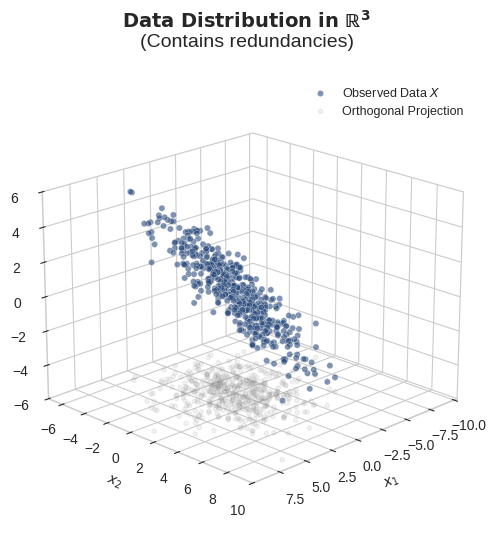

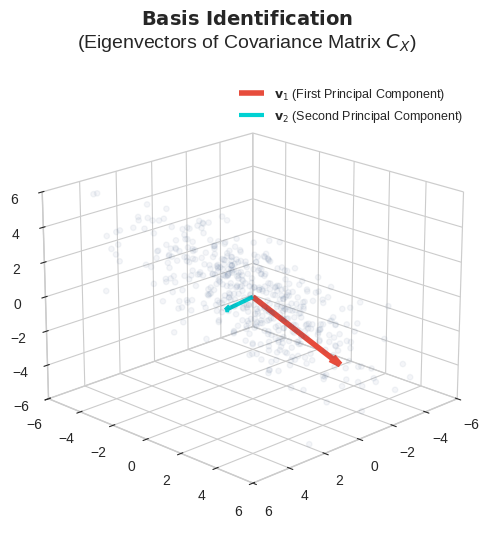

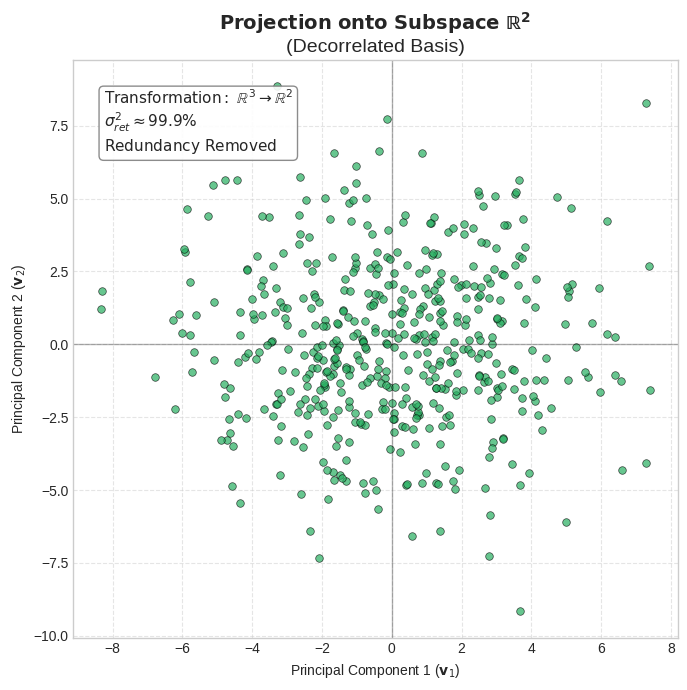

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
# The import below is required for 3D plotting even if not explicitly used
from mpl_toolkits.mplot3d import Axes3D

# --- 1. SETUP DATA (Optimized for High Signal-to-Noise) ---
np.random.seed(42)
n_samples = 500

# Generate the "Signal": Data with wide spread in 2 dimensions
# Multiplying by 3 increases the variance of the signal relative to the noise
true_hidden_data = np.random.randn(n_samples, 2) * 3

# Rotation Matrix: Embeds this 2D signal into 3D space
# This simulates the "redundancy" (3 sensors measuring 2 underlying variables)
rotation_matrix = np.array([
    [0.8,  0.4],
    [-0.2, 0.8],
    [0.5, -0.3]
])
X_3d = np.dot(true_hidden_data, rotation_matrix.T)

# Add minimal noise to the 3rd dimension
# Small noise (0.1) vs Signal (3.0) guarantees >98% explained variance
X_3d += np.random.normal(0, 0.1, size=X_3d.shape)

# Center the data (Standardization is a key assumption in Shlens' paper)
X_centered = X_3d - np.mean(X_3d, axis=0)

# --- 2. COMPUTE PCA ---
pca = PCA(n_components=2)
X_2d = pca.fit_transform(X_centered)
components = pca.components_
variance_ratio = pca.explained_variance_ratio_

# --- 3. PLOTTING (Formal Thesis Style) ---
plt.style.use('seaborn-v0_8-whitegrid')
fig1 = plt.figure(figsize=(20, 7))
fig2 = plt.figure(figsize=(20, 7))
fig3 = plt.figure(figsize=(20, 7))

# --- PLOT A: Data Distribution in R^3 ---
ax1 = fig1.add_subplot(131, projection='3d')

# Main scatter plot (The Manifold)
ax1.scatter(X_centered[:, 0], X_centered[:, 1], X_centered[:, 2],
            alpha=0.6, s=20, c='#2b4b7c', edgecolors='w', linewidth=0.3, label='Observed Data $X$')

# Projection on the floor (Visual proof of linear dependence)
ax1.scatter(X_centered[:, 0], X_centered[:, 1], -6,
            alpha=0.1, s=10, c='gray', label='Orthogonal Projection')

ax1.set_title(r'$\bf{Data\ Distribution\ in\ \mathbb{R}^3}$' + '\n(Contains redundancies)',
              fontsize=14, pad=20)
ax1.set_xlabel('$x_1$')
ax1.set_ylabel('$x_2$')
ax1.set_zlabel('$x_3$')
ax1.set_zlim(-6, 6)
ax1.view_init(elev=20, azim=45)
# Hide panes for a cleaner, "textbook" look
ax1.xaxis.pane.fill = False; ax1.yaxis.pane.fill = False; ax1.zaxis.pane.fill = False
ax1.legend(loc='upper right', fontsize=9)

# --- PLOT B: Eigenvectors of Covariance Matrix ---
ax2 = fig2.add_subplot(132, projection='3d')
ax2.scatter(X_centered[:, 0], X_centered[:, 1], X_centered[:, 2],
            alpha=0.05, s=15, c='#2b4b7c')

# Draw Eigenvectors
origin = [0, 0, 0]
# PC1 (First Eigenvector - Max Variance)
ax2.quiver(*origin, components[0,0], components[0,1], components[0,2],
           length=5, color='#e74c3c', linewidth=4, arrow_length_ratio=0.1,
           label=r'$\mathbf{v}_1$ (First Principal Component)')
# PC2 (Second Eigenvector)
ax2.quiver(*origin, components[1,0], components[1,1], components[1,2],
           length=3, color='#00d2d3', linewidth=3, arrow_length_ratio=0.15,
           label=r'$\mathbf{v}_2$ (Second Principal Component)')

ax2.set_title(r'$\bf{Basis\ Identification}$' + '\n(Eigenvectors of Covariance Matrix $C_X$)',
              fontsize=14, pad=20)
ax2.set_xlim(-6, 6); ax2.set_ylim(-6, 6); ax2.set_zlim(-6, 6)
ax2.view_init(elev=20, azim=45)
ax2.xaxis.pane.fill = False; ax2.yaxis.pane.fill = False; ax2.zaxis.pane.fill = False
ax2.legend(loc='upper right', fontsize=9)

# --- PLOT C: Projection onto Subspace ---
ax3 = fig3.add_subplot(133)
ax3.scatter(X_2d[:, 0], X_2d[:, 1], alpha=0.7, s=30, c='#27ae60', edgecolors='k', linewidth=0.5)

ax3.set_title(r'$\bf{Projection\ onto\ Subspace\ \mathbb{R}^2}$' + '\n(Decorrelated Basis)',
              fontsize=14)
ax3.set_xlabel(r'Principal Component 1 ($\mathbf{v}_1$)')
ax3.set_ylabel(r'Principal Component 2 ($\mathbf{v}_2$)')
ax3.grid(True, linestyle='--', alpha=0.5)

# Axis lines passing through origin
ax3.axhline(0, color='k', linestyle='-', linewidth=1, alpha=0.3)
ax3.axvline(0, color='k', linestyle='-', linewidth=1, alpha=0.3)

# Statistics Box (Formal Notation)
total_var = np.sum(variance_ratio) * 100
textstr = '\n'.join((
    r'$\mathrm{Transformation:}\ \mathbb{R}^3 \to \mathbb{R}^2$',
    r'$\sigma^2_{ret} \approx ' + f'{total_var:.1f}\% $', # Dynamic Calculation
    r'$\mathrm{Redundancy\ Removed}$'
))
props = dict(boxstyle='round', facecolor='white', alpha=0.9, edgecolor='gray')
ax3.text(0.05, 0.95, textstr, transform=ax3.transAxes, fontsize=11,
        verticalalignment='top', bbox=props)

plt.tight_layout()
plt.show()

<>:41: SyntaxWarning: invalid escape sequence '\m'
<>:81: SyntaxWarning: invalid escape sequence '\m'
<>:41: SyntaxWarning: invalid escape sequence '\m'
<>:81: SyntaxWarning: invalid escape sequence '\m'
/tmp/ipython-input-1278317438.py:41: SyntaxWarning: invalid escape sequence '\m'
  ax1.set_title(r'$\bf{Phase\ 1:\ The\ "Curse"\ of\ Dimensionality}$' + '\n(Correlated Data in $\mathbb{R}^3$)', fontsize=16)
/tmp/ipython-input-1278317438.py:81: SyntaxWarning: invalid escape sequence '\m'
  ax3.set_title(r'$\bf{Phase\ 3:\ Dimensionality\ Reduction}$' + '\n(Projection onto Subspace $\mathbb{R}^2$)', fontsize=16)


ValueError: 
$\bf{Phase\ 1:\ The\ "Curse"\ of\ Dimensionality}$
^
ParseException: Expected end of text, found '$'  (at char 0), (line:1, col:1)

<Figure size 1000x800 with 1 Axes>

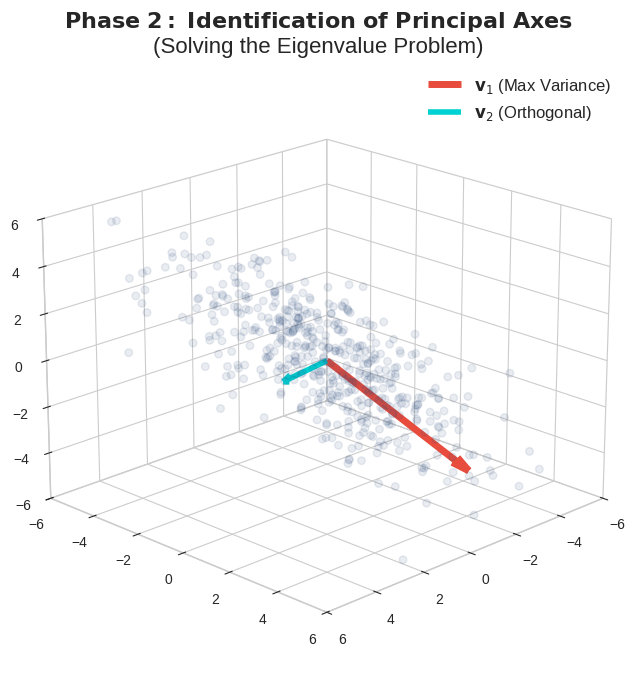

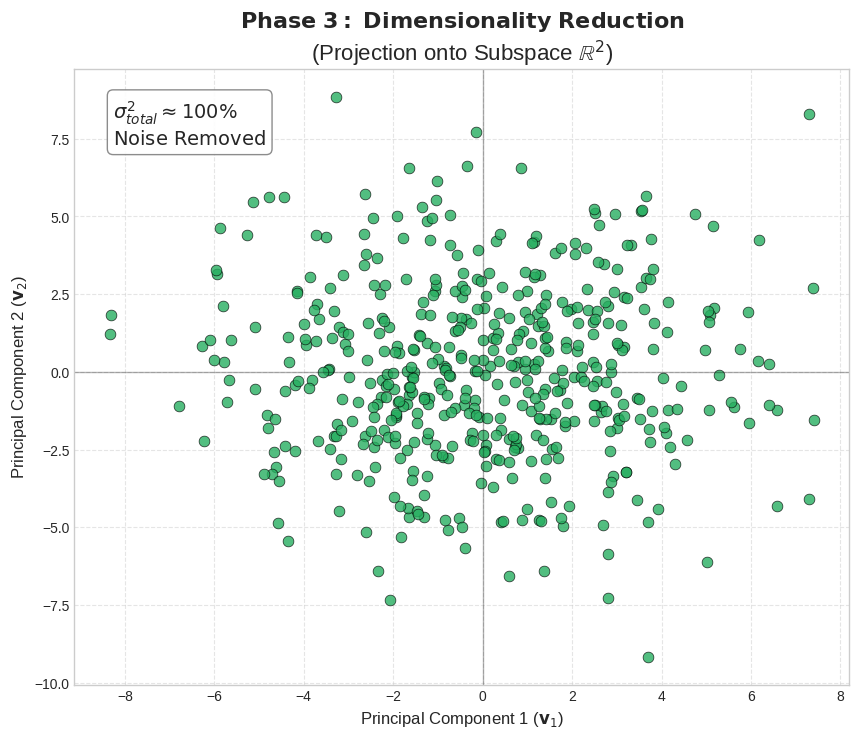

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D

# --- 1. SHARED DATA GENERATION (Crucial: Keep this consistent) ---
np.random.seed(42)
n_samples = 500

# Generate strong signal (2D structure)
true_hidden_data = np.random.randn(n_samples, 2) * 3
# Rotation Matrix (Embed in 3D)
rotation_matrix = np.array([[0.8, 0.4], [-0.2, 0.8], [0.5, -0.3]])
X_3d = np.dot(true_hidden_data, rotation_matrix.T)
# Add minimal noise
X_3d += np.random.normal(0, 0.1, size=X_3d.shape)
# Center the data
X_centered = X_3d - np.mean(X_3d, axis=0)

# Calculate PCA (for later slides)
pca = PCA(n_components=2)
X_2d = pca.fit_transform(X_centered)
components = pca.components_
variance_ratio = pca.explained_variance_ratio_

# Common Style Settings
plt.style.use('seaborn-v0_8-whitegrid')
datadot_color = '#2b4b7c'

# --- SLIDE 1: THE PROBLEM (Redundant 3D Data) ---
fig1 = plt.figure(figsize=(10, 8))
ax1 = fig1.add_subplot(111, projection='3d')

# Plot Data
ax1.scatter(X_centered[:, 0], X_centered[:, 1], X_centered[:, 2],
            alpha=0.6, s=40, c=datadot_color, edgecolors='w', linewidth=0.3)
# Plot Shadow (Visualizing redundancy)
ax1.scatter(X_centered[:, 0], X_centered[:, 1], -6,
            alpha=0.2, s=20, c='gray', label='Orthogonal Projection')

ax1.set_title(r'$\bf{Phase\ 1:\ The\ "Curse"\ of\ Dimensionality}$' + '\n(Correlated Data in $\mathbb{R}^3$)', fontsize=16)
ax1.set_xlabel('$x_1$'); ax1.set_ylabel('$x_2$'); ax1.set_zlabel('$x_3$')
ax1.set_zlim(-6, 6)
ax1.view_init(elev=20, azim=45)
ax1.xaxis.pane.fill = False; ax1.yaxis.pane.fill = False; ax1.zaxis.pane.fill = False
plt.show()

# --- SLIDE 2: THE METHOD (Eigenvectors) ---
fig2 = plt.figure(figsize=(10, 8))
ax2 = fig2.add_subplot(111, projection='3d')

# Plot Faint Data (Background)
ax2.scatter(X_centered[:, 0], X_centered[:, 1], X_centered[:, 2],
            alpha=0.1, s=30, c=datadot_color)

# Plot Eigenvectors (The Hero of the story)
origin = [0, 0, 0]
# PC1
ax2.quiver(*origin, components[0,0], components[0,1], components[0,2],
           length=6, color='#e74c3c', linewidth=5, arrow_length_ratio=0.1,
           label=r'$\mathbf{v}_1$ (Max Variance)')
# PC2
ax2.quiver(*origin, components[1,0], components[1,1], components[1,2],
           length=3.5, color='#00d2d3', linewidth=4, arrow_length_ratio=0.15,
           label=r'$\mathbf{v}_2$ (Orthogonal)')

ax2.set_title(r'$\bf{Phase\ 2:\ Identification\ of\ Principal\ Axes}$' + '\n(Solving the Eigenvalue Problem)', fontsize=16)
ax2.set_xlim(-6, 6); ax2.set_ylim(-6, 6); ax2.set_zlim(-6, 6)
ax2.view_init(elev=20, azim=45)
ax2.xaxis.pane.fill = False; ax2.yaxis.pane.fill = False; ax2.zaxis.pane.fill = False
ax2.legend(fontsize=12)
plt.show()

# --- SLIDE 3: THE SOLUTION (2D Projection) ---
fig3 = plt.figure(figsize=(10, 8))
ax3 = fig3.add_subplot(111)

# Plot 2D Result
ax3.scatter(X_2d[:, 0], X_2d[:, 1], alpha=0.8, s=60, c='#27ae60', edgecolors='k', linewidth=0.5)

ax3.set_title(r'$\bf{Phase\ 3:\ Dimensionality\ Reduction}$' + '\n(Projection onto Subspace $\mathbb{R}^2$)', fontsize=16)
ax3.set_xlabel(r'Principal Component 1 ($\mathbf{v}_1$)', fontsize=12)
ax3.set_ylabel(r'Principal Component 2 ($\mathbf{v}_2$)', fontsize=12)
ax3.grid(True, linestyle='--', alpha=0.5)
ax3.axhline(0, color='k', linestyle='-', linewidth=1, alpha=0.3)
ax3.axvline(0, color='k', linestyle='-', linewidth=1, alpha=0.3)

# Add Stats Box
total_var = np.sum(variance_ratio) * 100
textstr = '\n'.join((
    r'$\sigma^2_{total} \approx 100\% $',
    r'$\mathrm{Noise\ Removed}$'
))
props = dict(boxstyle='round', facecolor='white', alpha=0.9, edgecolor='gray')
ax3.text(0.05, 0.95, textstr, transform=ax3.transAxes, fontsize=14,
        verticalalignment='top', bbox=props)
plt.show()

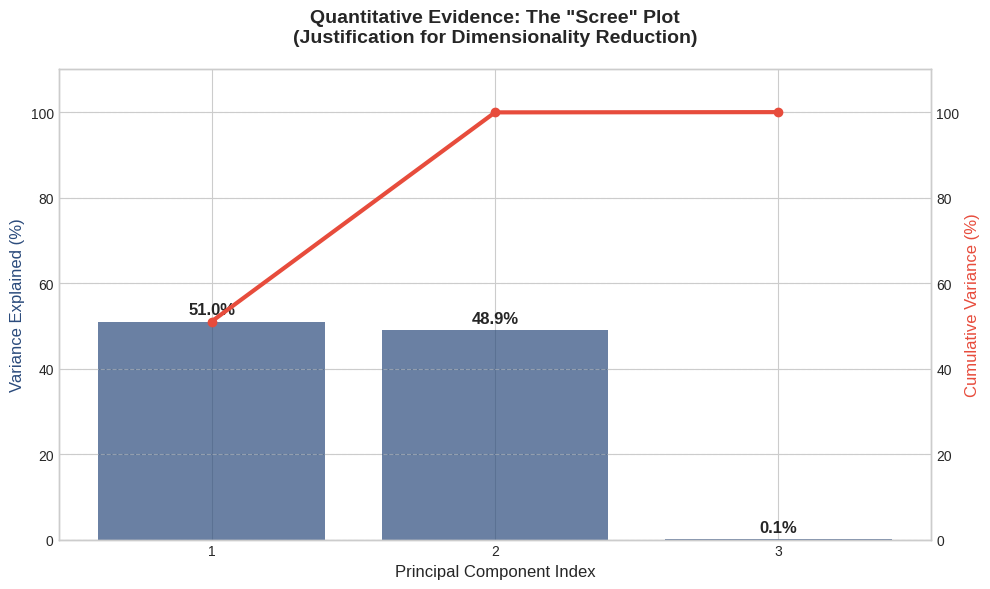

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# --- 1. REGENERATE DATA ---
np.random.seed(42)
n_samples = 500
true_hidden_data = np.random.randn(n_samples, 2) * 3
rotation_matrix = np.array([[0.8, 0.4], [-0.2, 0.8], [0.5, -0.3]])
X_3d = np.dot(true_hidden_data, rotation_matrix.T)
X_3d += np.random.normal(0, 0.1, size=X_3d.shape)
X_centered = X_3d - np.mean(X_3d, axis=0)

# --- 2. CALCULATE PCA ---
pca = PCA(n_components=3)
pca.fit(X_centered)
variance_ratio = pca.explained_variance_ratio_ * 100
cumulative_variance = np.cumsum(variance_ratio)

# --- 3. PLOT THE SCREE PLOT ---
plt.style.use('seaborn-v0_8-whitegrid')
fig, ax1 = plt.subplots(figsize=(10, 6))

# Bar Chart (Individual Variance)
bars = ax1.bar(range(1, 4), variance_ratio, alpha=0.7, color='#2b4b7c', label='Individual Variance')
ax1.set_xlabel('Principal Component Index', fontsize=12)
ax1.set_ylabel('Variance Explained (%)', fontsize=12, color='#2b4b7c')
ax1.set_xticks([1, 2, 3])
ax1.set_ylim(0, 110)

# Line Chart (Cumulative Variance)
ax2 = ax1.twinx()
ax2.plot(range(1, 4), cumulative_variance, color='#e74c3c', marker='o', linewidth=3, label='Cumulative Variance')
ax2.set_ylabel('Cumulative Variance (%)', fontsize=12, color='#e74c3c')
ax2.set_ylim(0, 110)

# Add value labels
for bar in bars:
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2., height + 1,
             f'{height:.1f}%', ha='center', va='bottom', fontsize=12, fontweight='bold')

# --- FIX: Removed LaTeX syntax ($) and used fontweight='bold' instead ---
plt.title('Quantitative Evidence: The "Scree" Plot\n(Justification for Dimensionality Reduction)',
          fontsize=14, fontweight='bold', pad=20)

plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

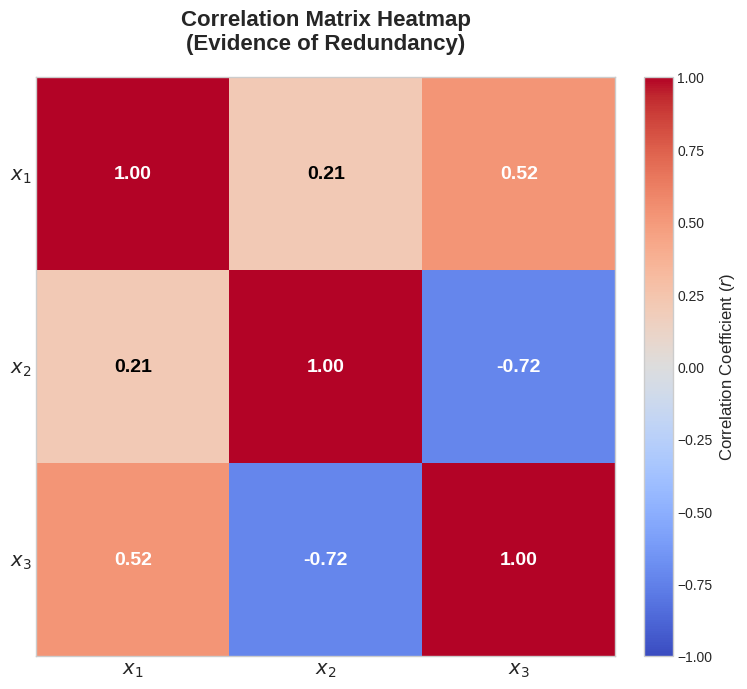

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# --- 1. REGENERATE DATA (To match previous slides) ---
np.random.seed(42)
n_samples = 500
true_hidden_data = np.random.randn(n_samples, 2) * 3
rotation_matrix = np.array([[0.8, 0.4], [-0.2, 0.8], [0.5, -0.3]])
X_3d = np.dot(true_hidden_data, rotation_matrix.T)
X_3d += np.random.normal(0, 0.1, size=X_3d.shape)

# --- 2. COMPUTE CORRELATION ---
# Calculate the 3x3 correlation matrix
corr_matrix = np.corrcoef(X_3d, rowvar=False)

# --- 3. PLOT HEATMAP ---
plt.style.use('seaborn-v0_8-whitegrid')
fig, ax = plt.subplots(figsize=(8, 7))

# Create Heatmap
# 'coolwarm' colormap: Red = Positive Corr, Blue = Negative Corr
im = ax.imshow(corr_matrix, cmap='coolwarm', vmin=-1, vmax=1)

# Add Colorbar
cbar = fig.colorbar(im, fraction=0.046, pad=0.04)
cbar.set_label('Correlation Coefficient ($r$)', fontsize=12)

# Add Text Annotations inside squares
for i in range(len(corr_matrix)):
    for j in range(len(corr_matrix)):
        # Choose text color based on background intensity
        color = 'white' if abs(corr_matrix[i, j]) > 0.5 else 'black'
        text = ax.text(j, i, f'{corr_matrix[i, j]:.2f}',
                       ha="center", va="center", color=color,
                       fontsize=14, fontweight='bold')

# Formatting Labels
labels = ['$x_1$', '$x_2$', '$x_3$']
ax.set_xticks(np.arange(len(labels)))
ax.set_yticks(np.arange(len(labels)))
ax.set_xticklabels(labels, fontsize=14)
ax.set_yticklabels(labels, fontsize=14)

# Title
ax.set_title("Correlation Matrix Heatmap\n(Evidence of Redundancy)",
             fontsize=16, fontweight='bold', pad=20)

# Clean up layout
plt.grid(False) # Turn off grid lines for heatmap
plt.tight_layout()
plt.show()

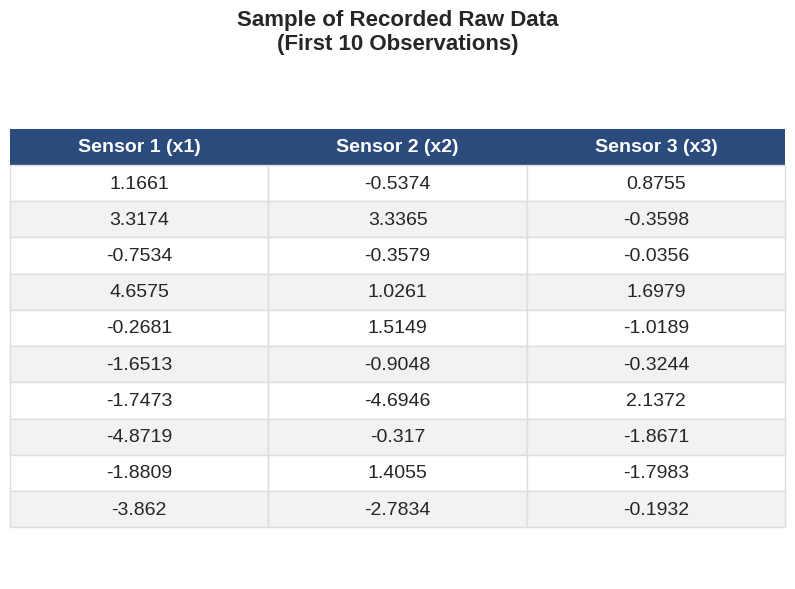

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# --- 1. REGENERATE DATA (Consistency) ---
np.random.seed(42)
n_samples = 500
true_hidden_data = np.random.randn(n_samples, 2) * 3
rotation_matrix = np.array([[0.8, 0.4], [-0.2, 0.8], [0.5, -0.3]])
X_3d = np.dot(true_hidden_data, rotation_matrix.T)
X_3d += np.random.normal(0, 0.1, size=X_3d.shape)

# Create a DataFrame for nice formatting
df = pd.DataFrame(X_3d, columns=['Sensor 1 (x1)', 'Sensor 2 (x2)', 'Sensor 3 (x3)'])

# --- 2. RENDER TABLE AS IMAGE ---
fig, ax = plt.subplots(figsize=(8, 6))

# Hide axes
ax.xaxis.set_visible(False)
ax.yaxis.set_visible(False)
ax.set_frame_on(False)

# Select first 10 rows to show
table_data = df.head(10).round(4) # Rounding looks cleaner

# Create the table
table = ax.table(cellText=table_data.values,
                 colLabels=table_data.columns,
                 cellLoc='center',
                 loc='center',
                 colColours=['#2b4b7c']*3) # Header color

# --- 3. STYLING THE TABLE ---
table.auto_set_font_size(False)
table.set_fontsize(14)
table.scale(1.2, 2) # Stretch height for readability

# Style specific cells
for (row, col), cell in table.get_celld().items():
    if row == 0:
        # Header Style
        cell.set_text_props(color='white', weight='bold')
        cell.set_linewidth(0)
    else:
        # Body Style
        cell.set_edgecolor('#dddddd') # Light gray grid
        if row % 2 == 0:
            cell.set_facecolor('#f2f2f2') # Zebra striping

plt.title('Sample of Recorded Raw Data\n(First 10 Observations)',
          fontsize=16, fontweight='bold', pad=20)

plt.tight_layout()
plt.show()

/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8942 (\N{VERTICAL ELLIPSIS}) missing from font(s) Liberation Sans.
  fig.canvas.print_figure(bytes_io, **kw)


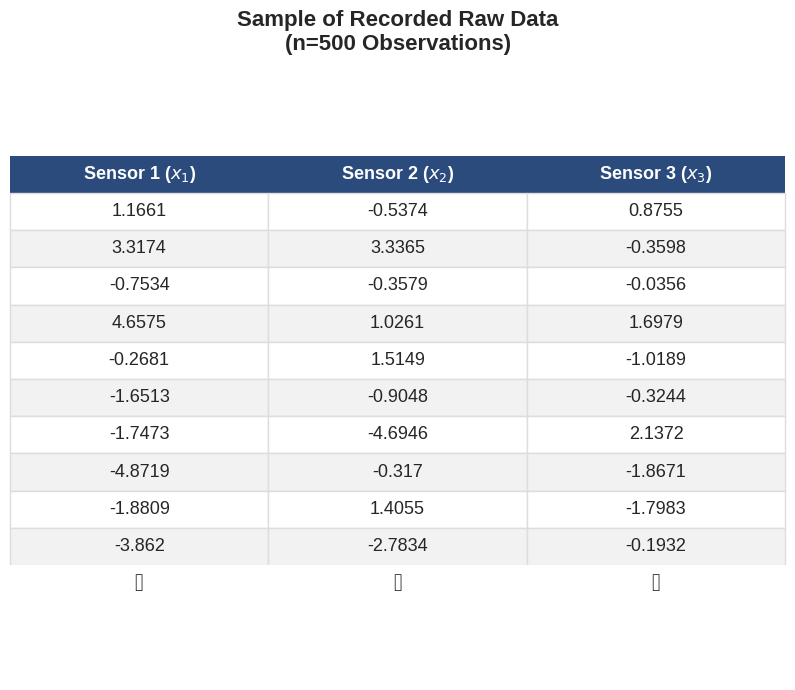

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# --- 1. REGENERATE DATA ---
np.random.seed(42)
n_samples = 500
true_hidden_data = np.random.randn(n_samples, 2) * 3
rotation_matrix = np.array([[0.8, 0.4], [-0.2, 0.8], [0.5, -0.3]])
X_3d = np.dot(true_hidden_data, rotation_matrix.T)
X_3d += np.random.normal(0, 0.1, size=X_3d.shape)

# Create DataFrame
df = pd.DataFrame(X_3d, columns=['Sensor 1 ($x_1$)', 'Sensor 2 ($x_2$)', 'Sensor 3 ($x_3$)'])

# --- 2. PREPARE TABLE DATA ---
# Take first 10 rows
table_df = df.head(10).round(4).astype(str)

# Create a row of ellipses
dots_row = pd.DataFrame([['⋮', '⋮', '⋮']], columns=table_df.columns)

# Combine them
final_df = pd.concat([table_df, dots_row], ignore_index=True)

# --- 3. RENDER TABLE ---
fig, ax = plt.subplots(figsize=(8, 7)) # Increased height slightly

# Hide axes
ax.xaxis.set_visible(False)
ax.yaxis.set_visible(False)
ax.set_frame_on(False)

# Create the table
table = ax.table(cellText=final_df.values,
                 colLabels=final_df.columns,
                 cellLoc='center',
                 loc='center',
                 colColours=['#2b4b7c']*3)

# --- 4. STYLING ---
table.auto_set_font_size(False)
table.set_fontsize(13)
table.scale(1.2, 2)

# Style specific cells
for (row, col), cell in table.get_celld().items():
    if row == 0:
        # Header Style
        cell.set_text_props(color='white', weight='bold')
        cell.set_linewidth(0)
    else:
        # Body Style
        cell.set_edgecolor('#dddddd')
        if row == len(final_df): # The last row (The Dots)
            cell.set_text_props(weight='bold', fontsize=18) # Make dots bigger
            cell.set_facecolor('white') # No background for dots
            cell.set_edgecolor('white') # Remove border for dots
        elif row % 2 == 0:
            cell.set_facecolor('#f2f2f2') # Zebra striping

plt.title('Sample of Recorded Raw Data\n(n=500 Observations)',
          fontsize=16, fontweight='bold', pad=20)

plt.tight_layout()
plt.show()

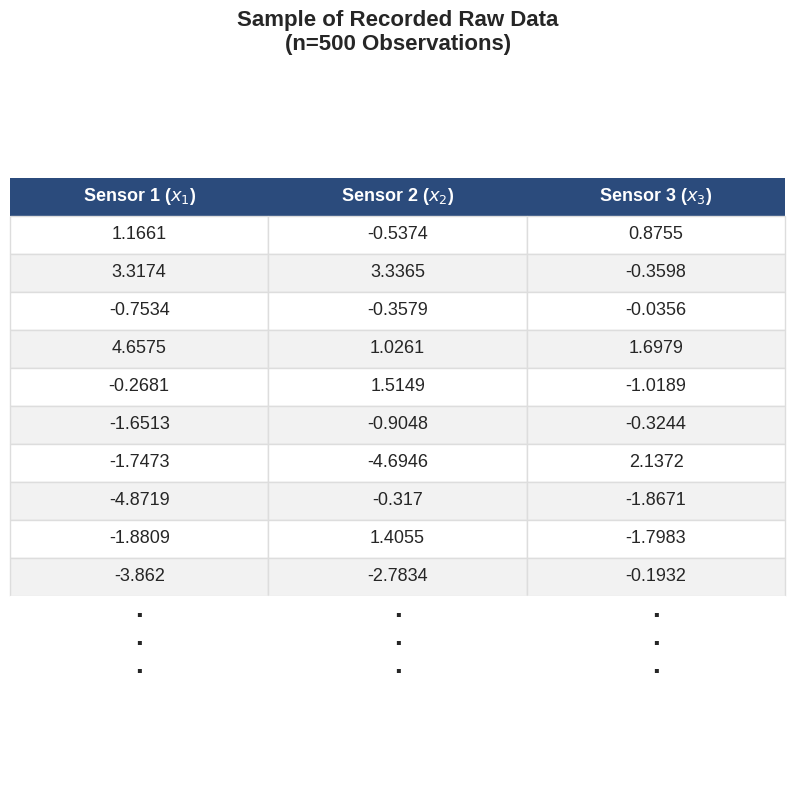

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# --- 1. REGENERATE DATA ---
np.random.seed(42)
n_samples = 500
true_hidden_data = np.random.randn(n_samples, 2) * 3
rotation_matrix = np.array([[0.8, 0.4], [-0.2, 0.8], [0.5, -0.3]])
X_3d = np.dot(true_hidden_data, rotation_matrix.T)
X_3d += np.random.normal(0, 0.1, size=X_3d.shape)

# Create DataFrame
df = pd.DataFrame(X_3d, columns=['Sensor 1 ($x_1$)', 'Sensor 2 ($x_2$)', 'Sensor 3 ($x_3$)'])

# --- 2. PREPARE TABLE DATA ---
# Take first 10 rows
table_df = df.head(10).round(4).astype(str)

# FIX: Instead of a special character, we add 3 rows of simple dots
# This manually draws a vertical ellipsis using standard text
dot_row_1 = pd.DataFrame([['.', '.', '.']], columns=table_df.columns)
dot_row_2 = pd.DataFrame([['.', '.', '.']], columns=table_df.columns)
dot_row_3 = pd.DataFrame([['.', '.', '.']], columns=table_df.columns)

# Combine them
final_df = pd.concat([table_df, dot_row_1, dot_row_2, dot_row_3], ignore_index=True)

# --- 3. RENDER TABLE ---
fig, ax = plt.subplots(figsize=(8, 8)) # Taller to fit extra rows

# Hide axes
ax.xaxis.set_visible(False)
ax.yaxis.set_visible(False)
ax.set_frame_on(False)

# Create the table
table = ax.table(cellText=final_df.values,
                 colLabels=final_df.columns,
                 cellLoc='center',
                 loc='center',
                 colColours=['#2b4b7c']*3)

# --- 4. STYLING ---
table.auto_set_font_size(False)
table.set_fontsize(13)
table.scale(1.2, 2)

# Style specific cells
for (row, col), cell in table.get_celld().items():
    if row == 0:
        # Header Style
        cell.set_text_props(color='white', weight='bold')
        cell.set_linewidth(0)
    else:
        # Body Style
        cell.set_edgecolor('#dddddd')

        # Check if we are in the last 3 rows (The Dots)
        if row > 10:
            cell.set_text_props(weight='bold', fontsize=20)
            cell.set_facecolor('white')
            cell.set_edgecolor('white') # Invisible border
            # Adjust padding to make them look like one vertical sequence
            cell.set_height(0.04)
        elif row % 2 == 0:
            cell.set_facecolor('#f2f2f2')

plt.title('Sample of Recorded Raw Data\n(n=500 Observations)',
          fontsize=16, fontweight='bold', pad=20)

plt.tight_layout()
plt.show()

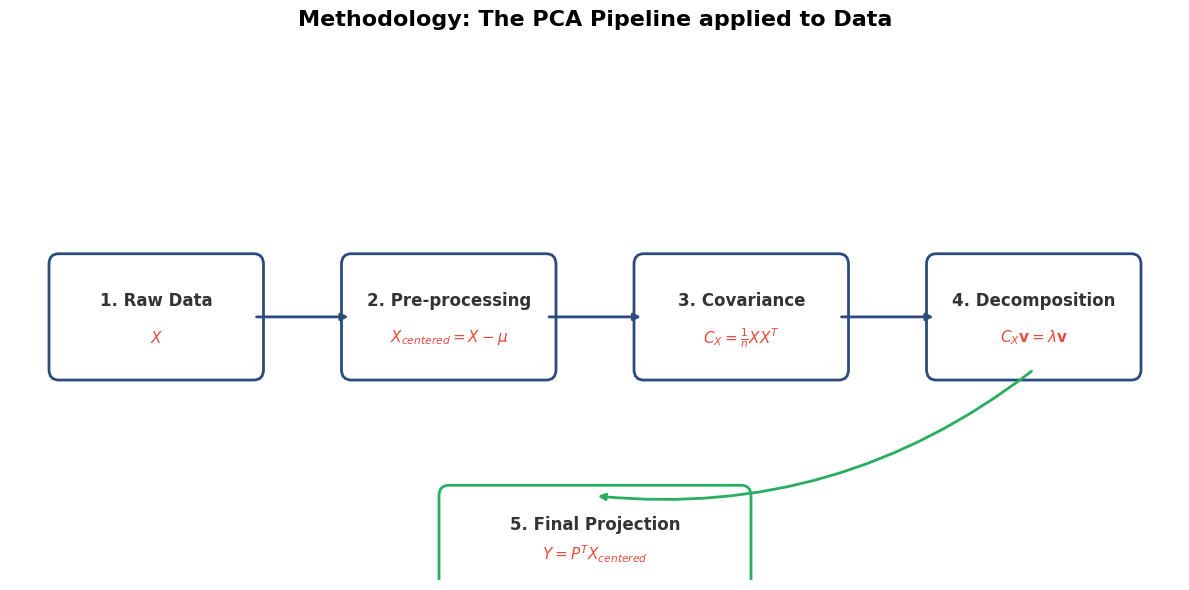

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# Setup Figure
fig, ax = plt.subplots(figsize=(12, 6))
ax.set_xlim(0, 12)
ax.set_ylim(0, 5)
ax.axis('off')

# --- Helper Function for Boxes ---
def draw_box(x, y, width, height, color, label, sublabel=""):
    # Draw Box
    box = patches.FancyBboxPatch((x, y), width, height, boxstyle="round,pad=0.1",
                                 edgecolor=color, facecolor='white', linewidth=2)
    ax.add_patch(box)

    # Add Label (Title)
    ax.text(x + width/2, y + height*0.65, label, ha='center', va='center',
            fontsize=12, fontweight='bold', color='#333333')

    # Add Sublabel (Math)
    if sublabel:
        ax.text(x + width/2, y + height*0.3, sublabel, ha='center', va='center',
                fontsize=11, color='#e74c3c', fontstyle='italic')
    return x + width, y + height/2 # Return coordinate for arrow start

# --- Helper Function for Arrows ---
def draw_arrow(x_start, y_start, x_end, label=""):
    ax.annotate("", xy=(x_end, y_start), xytext=(x_start, y_start),
                arrowprops=dict(arrowstyle="-|>", color='#2b4b7c', lw=2))
    if label:
        ax.text((x_start+x_end)/2, y_start + 0.2, label, ha='center', fontsize=10, color='#2b4b7c')

# --- DRAW THE PIPELINE ---

# Box 1: Raw Data
x1, y1 = draw_box(0.5, 2, 2.0, 1.0, '#2b4b7c', "1. Raw Data", r"$X$")

# Arrow 1
draw_arrow(x1, y1, 3.5)

# Box 2: Centering
x2, y2 = draw_box(3.5, 2, 2.0, 1.0, '#2b4b7c', "2. Pre-processing", r"$X_{centered} = X - \mu$")

# Arrow 2
draw_arrow(x2, y2, 6.5)

# Box 3: Covariance
x3, y3 = draw_box(6.5, 2, 2.0, 1.0, '#2b4b7c', "3. Covariance", r"$C_X = \frac{1}{n}XX^T$")

# Arrow 3
draw_arrow(x3, y3, 9.5)

# Box 4: Eigen-Decomposition
x4, y4 = draw_box(9.5, 2, 2.0, 1.0, '#2b4b7c', "4. Decomposition", r"$C_X \mathbf{v} = \lambda \mathbf{v}$")

# --- BRANCHING ARROW TO FINAL RESULT ---
# Draw arrow going down to "Projection"
ax.annotate("", xy=(6, 0.8), xytext=(10.5, 2),
            arrowprops=dict(arrowstyle="-|>", color='#27ae60', lw=2, connectionstyle="arc3,rad=-0.2"))

# Box 5: Projection (The Result)
draw_box(4.5, 0, 3.0, 0.8, '#27ae60', "5. Final Projection", r"$Y = P^T X_{centered}$")

# --- ADD TITLES ---
plt.title('Methodology: The PCA Pipeline applied to Data', fontsize=16, fontweight='bold', pad=20)

plt.tight_layout()
plt.show()

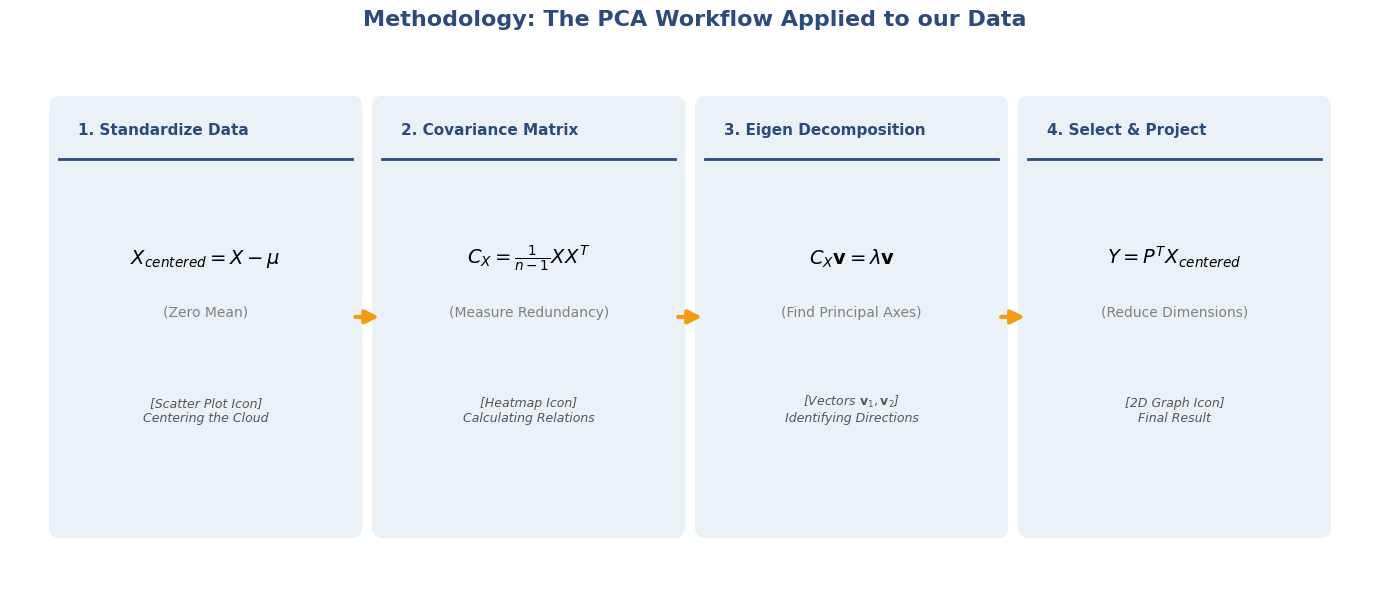

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# Setup Figure
fig, ax = plt.subplots(figsize=(14, 6))
ax.set_xlim(0, 14)
ax.set_ylim(0, 5)
ax.axis('off')

# --- Helper Function for Panels ---
def draw_panel(x, width, height, title, step_num, color='#eaf2f8'):
    # Background Box
    box = patches.FancyBboxPatch((x, 0.5), width, height, boxstyle="round,pad=0.1",
                                 facecolor=color, edgecolor='none')
    ax.add_patch(box)

    # Header Line
    ax.plot([x, x+width], [4, 4], color='#2b4b7c', lw=2)

    # Title
    ax.text(x + 0.2, 4.2, f"{step_num}. {title}", fontsize=11, fontweight='bold', color='#2b4b7c', va='bottom')

    return x + width # return right edge

# --- DRAW THE 4 PANELS ---

# Panel 1: Standardize
x1 = 0.5
w = 3.0
draw_panel(x1, w, 4, "Standardize Data", 1)
ax.text(x1 + w/2, 3, r"$X_{centered} = X - \mu$", fontsize=14, ha='center', color='black')
ax.text(x1 + w/2, 2.5, "(Zero Mean)", fontsize=10, ha='center', color='gray')
# Mini Plot (Scatter)
ax.text(x1 + w/2, 1.5, "[Scatter Plot Icon]\nCentering the Cloud", ha='center', fontsize=9, style='italic', color='#555')

# Panel 2: Covariance
x2 = 3.8
draw_panel(x2, w, 4, "Covariance Matrix", 2)
ax.text(x2 + w/2, 3, r"$C_X = \frac{1}{n-1}XX^T$", fontsize=14, ha='center', color='black')
ax.text(x2 + w/2, 2.5, "(Measure Redundancy)", fontsize=10, ha='center', color='gray')
# Mini Plot (Matrix)
ax.text(x2 + w/2, 1.5, "[Heatmap Icon]\nCalculating Relations", ha='center', fontsize=9, style='italic', color='#555')

# Panel 3: Decomposition
x3 = 7.1
draw_panel(x3, w, 4, "Eigen Decomposition", 3)
ax.text(x3 + w/2, 3, r"$C_X \mathbf{v} = \lambda \mathbf{v}$", fontsize=14, ha='center', color='black')
ax.text(x3 + w/2, 2.5, "(Find Principal Axes)", fontsize=10, ha='center', color='gray')
# Mini Plot (Vectors)
ax.text(x3 + w/2, 1.5, r"[Vectors $\mathbf{v}_1, \mathbf{v}_2$]" + "\nIdentifying Directions", ha='center', fontsize=9, style='italic', color='#555')

# Panel 4: Project
x4 = 10.4
draw_panel(x4, w, 4, "Select & Project", 4)
ax.text(x4 + w/2, 3, r"$Y = P^T X_{centered}$", fontsize=14, ha='center', color='black')
ax.text(x4 + w/2, 2.5, "(Reduce Dimensions)", fontsize=10, ha='center', color='gray')
# Mini Plot (Projection)
ax.text(x4 + w/2, 1.5, "[2D Graph Icon]\nFinal Result", ha='center', fontsize=9, style='italic', color='#555')

# --- CONNECTING ARROWS ---
arrow_props = dict(arrowstyle="-|>", color='#f39c12', lw=3, mutation_scale=20) # Orange arrows like the sample

ax.annotate("", xy=(x2, 2.5), xytext=(x1+w, 2.5), arrowprops=arrow_props)
ax.annotate("", xy=(x3, 2.5), xytext=(x2+w, 2.5), arrowprops=arrow_props)
ax.annotate("", xy=(x4, 2.5), xytext=(x3+w, 2.5), arrowprops=arrow_props)

# --- GLOBAL TITLE ---
plt.title("Methodology: The PCA Workflow Applied to our Data", fontsize=16, fontweight='bold', pad=20, color='#2b4b7c')

plt.tight_layout()
plt.show()